In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import print_function
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os
from sklearn.metrics import confusion_matrix, classification_report
import itertools

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# unpack the data into train and test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
X_train.ndim

4

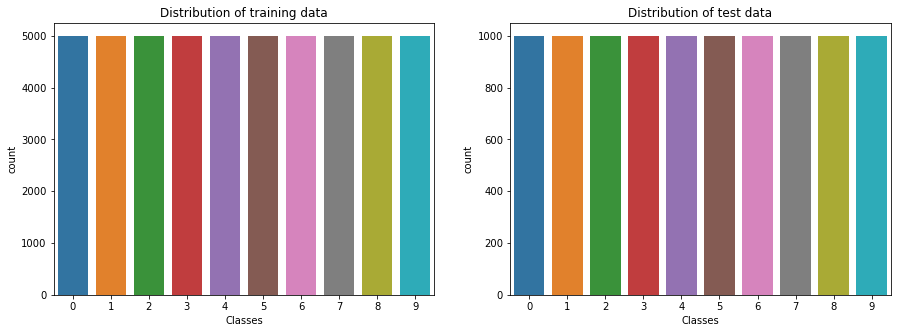

In [4]:
# Distribution of the data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(y_train.ravel(), ax=ax[0])
ax[0].set_title('Distribution of training data')
ax[0].set_xlabel('Classes')
sns.countplot(y_test.ravel(), ax=ax[1])
ax[1].set_title('Distribution of test data')
ax[1].set_xlabel('Classes')
plt.show()

# **Normalization**

In [5]:
# convert the data to float data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# make the data point to range from 0 and 1 (normalization)
#same as using a StandardScaler
X_train /= 255
X_test /= 255

# one hot encoding
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [6]:
# convert the data into grayscale
X_train.reshape(-1, 32, 32, 1)
X_train.shape

(50000, 32, 32, 3)

# **Model - CNN**

In [7]:
model = Sequential()

# CONV > RELU > CONV > RELU > MAXPOOL > DROPOUT
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV > RELU > CONV > RELU > MAXPOOL > DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN > DENSE > RELU > DROPOUT
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# DENSE > SOFTMAX
model.add(Dense(10))
model.add(Activation('softmax'))

#optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        fill_mode='nearest', # set mode for filling points outside the input boundaries
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None, # set rescaling factor (applied before any other transformation)
        preprocessing_function=None, # set function that will be applied on each input
        data_format=None, # image data format, either "channels_first" or "channels_last"
        validation_split=0.0) # fraction of images reserved for validation (strictly between 0 and 1)

earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', mode='min',
                                                         patience=3, verbose=1)

history = model.fit(datagen.flow(X_train, y_train,batch_size=128),
                    validation_data=datagen.flow(X_test, y_test),
                    epochs=10, workers=4, callbacks=earlystopping)

Epoch 1/10
391/391 [==============================] - 530s 1s/step - loss: 1.8501 - accuracy: 0.3118 - val_loss: 1.5251 - val_accuracy: 0.4354
Epoch 2/10
391/391 [==============================] - 595s 2s/step - loss: 1.5168 - accuracy: 0.4482 - val_loss: 1.2964 - val_accuracy: 0.5314
Epoch 3/10
391/391 [==============================] - 555s 1s/step - loss: 1.3726 - accuracy: 0.5059 - val_loss: 1.1908 - val_accuracy: 0.5730
Epoch 4/10
391/391 [==============================] - 558s 1s/step - loss: 1.2718 - accuracy: 0.5479 - val_loss: 1.1633 - val_accuracy: 0.5827
Epoch 5/10
391/391 [==============================] - 551s 1s/step - loss: 1.1983 - accuracy: 0.5714 - val_loss: 1.0452 - val_accuracy: 0.6287
Epoch 6/10
391/391 [==============================] - 612s 2s/step - loss: 1.1480 - accuracy: 0.5957 - val_loss: 0.9915 - val_accuracy: 0.6481
Epoch 7/10
391/391 [==============================] - 556s 1s/step - loss: 1.0969 - accuracy: 0.6133 - val_loss: 0.9686 - val_accuracy: 0.6568

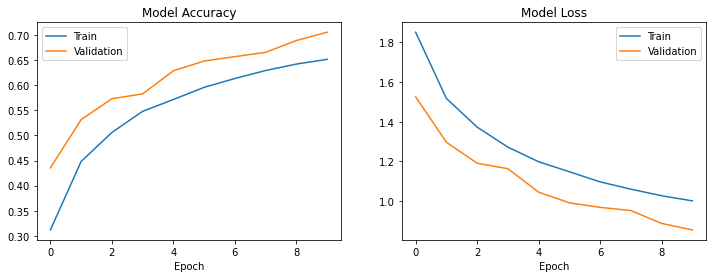

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

In [18]:
# test the model and make predictions
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: ', scores[1])

# make a prediction on the test data
pred = model.predict(X_test)

313/313 [==============================] - 81s 258ms/step - loss: 0.8440 - accuracy: 0.7101
Test accuracy:  0.710099995136261



# **Model Evaluation**

<AxesSubplot:>

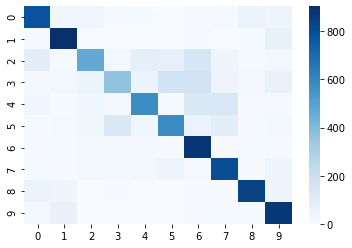

In [67]:
# confusion matrix on the predictions
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
pred_classes = np.argmax(pred, axis=1)
test_classes = np.argmax(y_test, axis=1)
sns.heatmap(confusion_matrix(test_classes, pred_classes), cmap=plt.cm.Blues)

In [70]:
print(classification_report(test_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.79      0.90      0.85      1000
           2       0.70      0.47      0.56      1000
           3       0.61      0.37      0.46      1000
           4       0.72      0.58      0.64      1000
           5       0.64      0.58      0.61      1000
           6       0.62      0.89      0.73      1000
           7       0.69      0.81      0.75      1000
           8       0.84      0.84      0.84      1000
           9       0.71      0.88      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



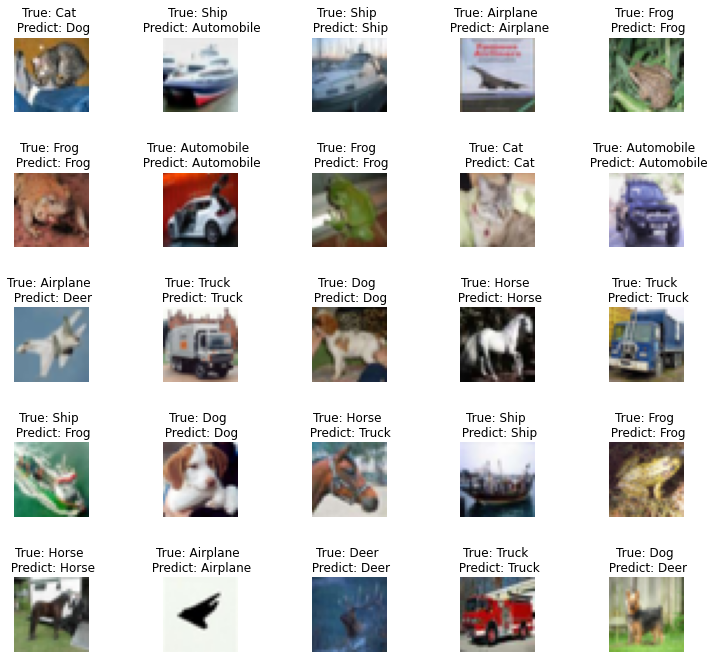

In [72]:
# Check the predictions
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

for i in np.arange(0, 5*5):
    ax[i].imshow(X_test[i])
    ax[i].set_title('True: %s \n Predict: %s' % (labels[test_classes[i]], 
                                                 labels[pred_classes[i]]))
    ax[i].axis('off')
    plt.subplots_adjust(wspace=1)